# Imports

In [0]:
#imports 
import numpy as np
import pandas as pd
import json
import os

# visualization
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

# training models
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing import image
import keras

# preprocessing
from keras.preprocessing.image import ImageDataGenerator

# bar chart
import re
import seaborn as sns

# confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Helper functions

## General

In [0]:
#Helper function to scan contents of directory
def search_dir(type="normal", num=6):
  counter=0

  for file in os.listdir(trainDir + type.upper()+ "/"):
      if counter == num:
          break

      if file.endswith(".jpeg"):
          print(file)

      counter += 1
      
# Helper function to plot images
def plot_images(type="normal", num=6):
  counter=0
  fig = plt.figure(figsize=(10, 8))
  

  for file in os.listdir(trainDir + type.upper()):

      if file.endswith(".jpeg"):
          if counter == num:
              break

          img = mpimg.imread(trainDir + type.upper()+"/"+file)
          plt.subplot(231+counter)
          plt.title(file.split('.')[0])
          imgplot = plt.imshow(img)

          counter += 1

def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])
  


## Bar plots

In [0]:
# show barplot
def bar_plot(x, y, plot_property):
    if plot_property['subplot']:
        plt.subplot(plot_property['subplot'])
    sns.barplot(x=x, y=y)
    plt.title(plot_property['title'], fontsize=plot_property['title_fontsize'])
    plt.xlabel(plot_property['xlabel'], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'], fontsize=plot_property['label_fontsize'])
    plt.xticks(range(len(x)), x)

# Removes everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

# count number of files in each subdirectory of a directory
def subdirectory_file_count(master_directory):
    subdirectories = os.listdir(master_directory)
    subdirectory_count = len(subdirectories)

    subdirectory_names = []
    subdirectory_file_counts = []

    for subdirectory in subdirectories:
        current_directory = os.path.join(master_directory, subdirectory)
        file_count = len(os.listdir(current_directory))
        subdirectory_names.append(subdirectory)
        subdirectory_file_counts.append(file_count)
    
    return subdirectory_names, subdirectory_file_counts
         
    
  
def count_bar_plot(master_directory, plot_property):
    dir_name, dir_file_count = subdirectory_file_count(master_directory)
    x = [name_correct(i) for i in dir_name]
    # x = dir_name
    y = dir_file_count
    bar_plot(x, y, plot_property)
  
def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params
  
def show_train_val_test(training_dir, validation_dir, testing_dir, plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']
    plot_property['title'] = title + " (Training)"
    subplot_no = plot_property['subplot'] 

    count_bar_plot(training_dir, plot_property)
    
    
    plot_property['title'] = title + " (Validation)"
    plot_property['subplot'] = subplot_no+1
    count_bar_plot(validation_dir, plot_property)
    
    
    plot_property['title'] = title + " (Testing)"
    plot_property['subplot'] = subplot_no + 2
    count_bar_plot(testing_dir, plot_property)
    
    plt.show()

# Download Data

In [0]:
# retrieve credentials from file
with open('kaggle.json') as f:
    d = json.load(f)
    
# set up credentials to download data
os.environ['KAGGLE_USERNAME'] = d["username"]
os.environ['KAGGLE_KEY'] = d["key"]

# download dataset from kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip
os.remove('chest-xray-pneumonia.zip')

In [0]:
#Point to the relevant directories
trainDir = "chest_xray/train/" # train
valDir   = "chest_xray/test/" # test
testDir  = "chest_xray/val/" # final model scoring

# Explore data

## File names

In [24]:
# List 10 filenames in the pneumonia dataset
search_dir(type="pneumonia", num=10)

person349_bacteria_1605.jpeg
person1599_bacteria_4201.jpeg
person539_bacteria_2270.jpeg
person292_virus_600.jpeg
person1045_bacteria_2979.jpeg
person544_virus_1080.jpeg
person1490_bacteria_3891.jpeg
person1557_bacteria_4065.jpeg
person1486_bacteria_3884.jpeg
person23_bacteria_81.jpeg


In [25]:
# List 10 filenames in the normal dataset
search_dir(type="normal", num=10)

NORMAL2-IM-0680-0001.jpeg
NORMAL2-IM-1041-0001.jpeg
IM-0439-0001-0001.jpeg
NORMAL2-IM-1266-0001.jpeg
NORMAL2-IM-0415-0001.jpeg
IM-0508-0001.jpeg
IM-0730-0001.jpeg
IM-0608-0001-0002.jpeg
NORMAL2-IM-0662-0001.jpeg
NORMAL2-IM-1258-0001-0001.jpeg


## Pictures

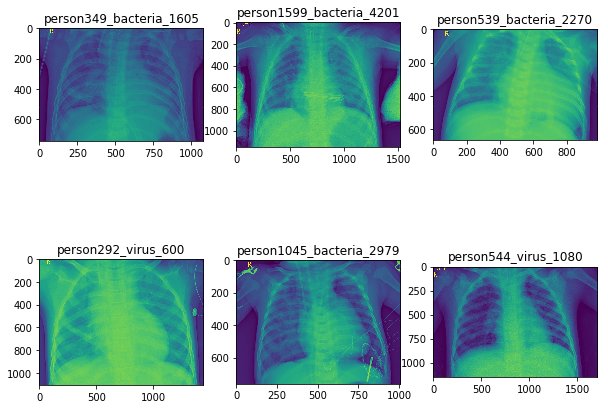

In [23]:
plot_images(type="pneumonia", num=6)

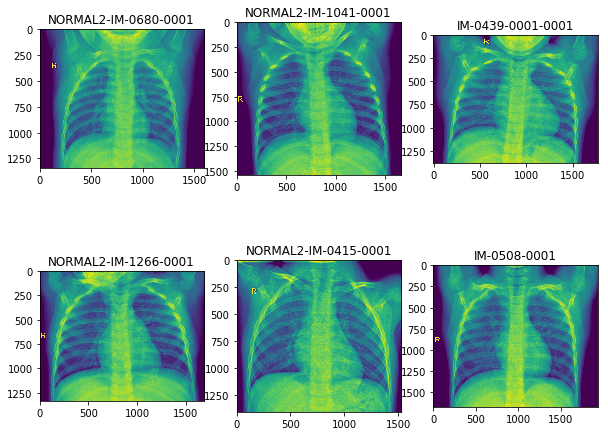

In [22]:

plot_images(type="normal", num=6)

## Bar chart

Shows what percentage of training and test data contains Pneumonia

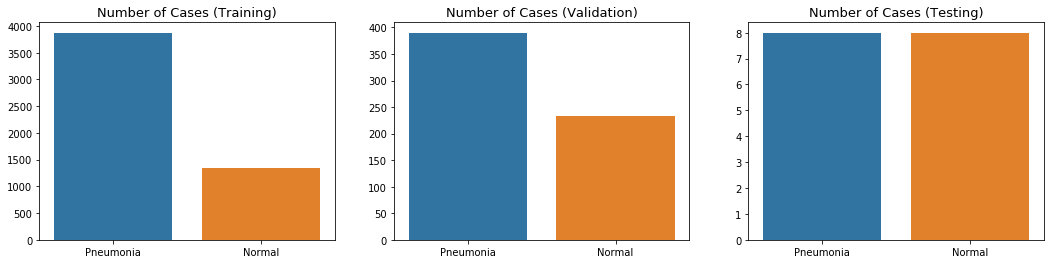

In [62]:
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = "Number of Cases"

plot_params['subplot'] = 131

show_train_val_test(trainDir, valDir, testDir, plot_params)

# Modeling

## Prepair data



In [47]:
batch_size=163 # how many files to read in at a time


# Create training data generator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1) #Create image generator in the abstract

train_generator = train_datagen.flow_from_directory(
        trainDir, #directory that contains training data
        target_size=(150, 150), #what size image we want
        batch_size=batch_size, #how many files to read in at a time
        class_mode="categorical")

Found 5216 images belonging to 2 classes.


In [48]:
# Create validation data generator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        valDir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode="categorical")

Found 624 images belonging to 2 classes.


In [49]:
# Create validation test generator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        testDir,
        target_size=(150, 150),
        batch_size=1,
        class_mode="categorical",
        shuffle=False)

Found 16 images belonging to 2 classes.


## Training

### Configure model for training

In [0]:
# remove top layer (previously learned classifications)
base_model = InceptionV3(weights='imagenet', include_top=False)

# configure layer
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)

# Freeze the layers not to train
for layer in base_model.layers:
  layer.trainable = False  
  
# create final model
final_model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)

Compiling specifies type of loss to optimize on, method of optimization, and key metric that we care about

In [53]:
final_model.compile(loss ="categorical_crossentropy", #another term for log loss
                    optimizer = "adam", 
                    metrics=["accuracy"])

### Train the model

In [54]:
fit_history = final_model.fit_generator(
        train_generator, #train data generator 
        steps_per_epoch=len(train_generator),
        epochs=5,
        validation_data=val_generator, #validation data generator 
        validation_steps=len(val_generator))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
32/32 [==============================] - 448s 14s/step - loss: 0.5304 - acc: 0.8345 - val_loss: 4.5433 - val_acc: 0.4647
Epoch 2/5
32/32 [==============================] - 416s 13s/step - loss: 0.2617 - acc: 0.9024 - val_loss: 1.7530 - val_acc: 0.6218
Epoch 3/5
32/32 [==============================] - 413s 13s/step - loss: 0.2237 - acc: 0.9095 - val_loss: 1.7674 - val_acc: 0.6763
Epoch 4/5
32/32 [==============================] - 415s 13s/step - loss: 0.2229 - acc: 0.9156 - val_loss: 1.1383 - val_acc: 0.7035
Epoch 5/5
32/32 [==============================] - 414s 13s/step - loss: 0.2120 - acc: 0.9170 - val_loss: 1.3128 - val_acc: 0.7067


### Accuracy results

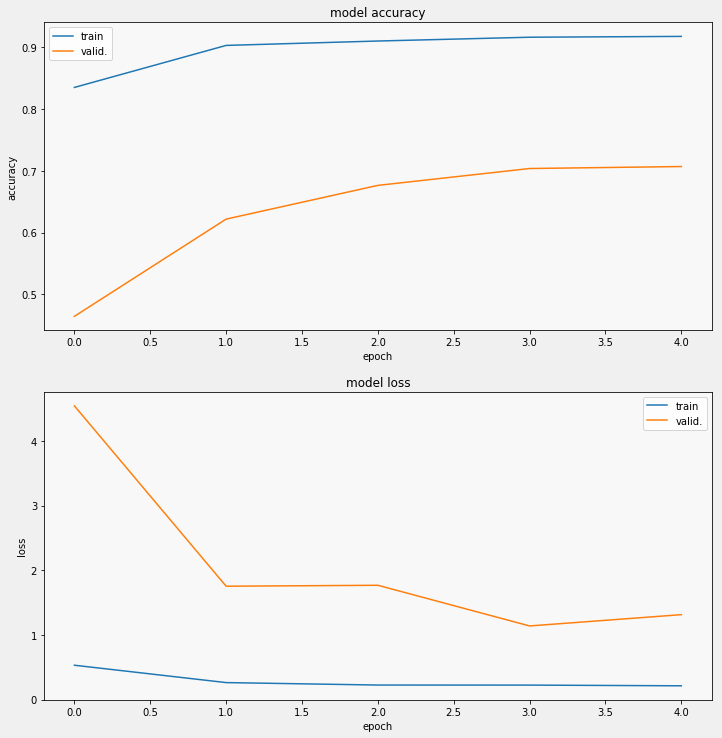

In [55]:
display_training_curves(fit_history.history['acc'], fit_history.history['val_acc'], 'accuracy', 211)
display_training_curves(fit_history.history['loss'], fit_history.history['val_loss'], 'loss', 212)

In [56]:
result  = final_model.evaluate_generator(test_generator,steps=len(test_generator))
print('Loss:', result[0])
print('Accuracy:', result[1])

Loss: 1.1425253052101425
Accuracy: 0.625


In [73]:
y_pred = final_model.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
y_pred = y_pred.argmax(axis=-1)
y_true = test_generator.classes

16/16 [==============================] - 2s 108ms/step


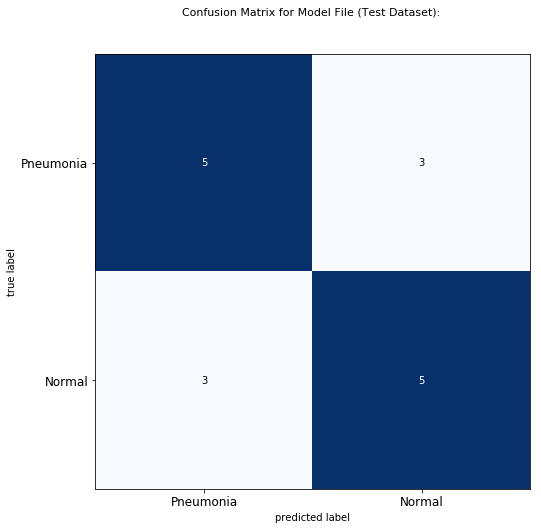

In [74]:
classes = os.listdir(trainDir)
classes = [name_correct(i) for i in classes]

CM = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.title("Confusion Matrix for Model File (Test Dataset): \n", fontsize=11)
fig.savefig("confusionMatrix", dpi=100)
plt.show()